In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from tqdm.notebook import tqdm_notebook


In [2]:
import nltk
from nltk.corpus import stopwords

In [3]:
train = pd.read_csv('sexismdataset.csv')

In [4]:
train.shape

(14881, 5)

In [5]:
train.head()

,index,id,Text,Annotation,oh_label
0,5.35198627292254E+017,5.35198627292254E+017,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,sexism,1.0
1,5.75984924030714E+017,5.75984924030714E+017,There's some very hate able teams this year #MKR,none,0.0
2,5.7233536016588E+017,5.7233536016588E+017,"RT @The_Eccles: ""Everyone underestimated us"" \...",none,0.0
3,5.72337925708374E+017,5.72337925708374E+017,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,none,0.0
4,4.43033024528011E+017,4.43033024528011E+017,"No, you don't. @Shut_Up_Jeff: I thought of a r...",sexism,1.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14881 entries, 0 to 14880
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       14881 non-null  object 
 1   id          14880 non-null  object 
 2   Text        14880 non-null  object 
 3   Annotation  14878 non-null  object 
 4   oh_label    14878 non-null  float64
dtypes: float64(1), object(4)
memory usage: 581.4+ KB


In [7]:
train.isnull().sum()

index         0
id            1
Text          1
Annotation    3
oh_label      3
dtype: int64

In [8]:
train['oh_label'].value_counts()

0.0    11501
1.0     3377
Name: oh_label, dtype: int64

In [9]:
train['oh_label'].nunique()

2

In [10]:
train.dropna()

,index,id,Text,Annotation,oh_label
0,5.35198627292254E+017,5.35198627292254E+017,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,sexism,1.0
1,5.75984924030714E+017,5.75984924030714E+017,There's some very hate able teams this year #MKR,none,0.0
2,5.7233536016588E+017,5.7233536016588E+017,"RT @The_Eccles: ""Everyone underestimated us"" \...",none,0.0
3,5.72337925708374E+017,5.72337925708374E+017,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,none,0.0
4,4.43033024528011E+017,4.43033024528011E+017,"No, you don't. @Shut_Up_Jeff: I thought of a r...",sexism,1.0
...,...,...,...,...,...
14876,5.76422824501379E+017,5.76422824501379E+017,@RaikonL @finaleve @mja333 WHY DO YOU HATE FRE...,none,0.0
14877,4.64045547473498E+017,4.64045547473498E+017,It is unconscionable that our regulatory bodie...,none,0.0
14878,5.54705698508919E+017,5.54705698508919E+017,@Dartanveerahmad @Janx53 @geehall1 We want ISI...,none,0.0
14879,5.7560079584598E+017,5.7560079584598E+017,#mkr Unbelievable how low Kat &amp; Andre wil...,none,0.0


In [11]:
train['oh_label'].dtype

dtype('float64')

In [12]:
train.isnull().sum()

index         0
id            1
Text          1
Annotation    3
oh_label      3
dtype: int64

In [13]:
train.dropna(inplace= True)

In [14]:
train.isnull().sum()

index         0
id            0
Text          0
Annotation    0
oh_label      0
dtype: int64

In [15]:
train

,index,id,Text,Annotation,oh_label
0,5.35198627292254E+017,5.35198627292254E+017,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,sexism,1.0
1,5.75984924030714E+017,5.75984924030714E+017,There's some very hate able teams this year #MKR,none,0.0
2,5.7233536016588E+017,5.7233536016588E+017,"RT @The_Eccles: ""Everyone underestimated us"" \...",none,0.0
3,5.72337925708374E+017,5.72337925708374E+017,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,none,0.0
4,4.43033024528011E+017,4.43033024528011E+017,"No, you don't. @Shut_Up_Jeff: I thought of a r...",sexism,1.0
...,...,...,...,...,...
14876,5.76422824501379E+017,5.76422824501379E+017,@RaikonL @finaleve @mja333 WHY DO YOU HATE FRE...,none,0.0
14877,4.64045547473498E+017,4.64045547473498E+017,It is unconscionable that our regulatory bodie...,none,0.0
14878,5.54705698508919E+017,5.54705698508919E+017,@Dartanveerahmad @Janx53 @geehall1 We want ISI...,none,0.0
14879,5.7560079584598E+017,5.7560079584598E+017,#mkr Unbelievable how low Kat &amp; Andre wil...,none,0.0


In [16]:
train['oh_label']=train['oh_label'].astype(int)

In [17]:
train

,index,id,Text,Annotation,oh_label
0,5.35198627292254E+017,5.35198627292254E+017,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,sexism,1
1,5.75984924030714E+017,5.75984924030714E+017,There's some very hate able teams this year #MKR,none,0
2,5.7233536016588E+017,5.7233536016588E+017,"RT @The_Eccles: ""Everyone underestimated us"" \...",none,0
3,5.72337925708374E+017,5.72337925708374E+017,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,none,0
4,4.43033024528011E+017,4.43033024528011E+017,"No, you don't. @Shut_Up_Jeff: I thought of a r...",sexism,1
...,...,...,...,...,...
14876,5.76422824501379E+017,5.76422824501379E+017,@RaikonL @finaleve @mja333 WHY DO YOU HATE FRE...,none,0
14877,4.64045547473498E+017,4.64045547473498E+017,It is unconscionable that our regulatory bodie...,none,0
14878,5.54705698508919E+017,5.54705698508919E+017,@Dartanveerahmad @Janx53 @geehall1 We want ISI...,none,0
14879,5.7560079584598E+017,5.7560079584598E+017,#mkr Unbelievable how low Kat &amp; Andre wil...,none,0


In [18]:
train.drop(['index','id','Annotation'],axis=1)

,Text,oh_label
0,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,1
1,There's some very hate able teams this year #MKR,0
2,"RT @The_Eccles: ""Everyone underestimated us"" \...",0
3,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,0
4,"No, you don't. @Shut_Up_Jeff: I thought of a r...",1
...,...,...
14876,@RaikonL @finaleve @mja333 WHY DO YOU HATE FRE...,0
14877,It is unconscionable that our regulatory bodie...,0
14878,@Dartanveerahmad @Janx53 @geehall1 We want ISI...,0
14879,#mkr Unbelievable how low Kat &amp; Andre wil...,0


In [19]:
train[train.duplicated()]

,index,id,Text,Annotation,oh_label


In [20]:
train

,index,id,Text,Annotation,oh_label
0,5.35198627292254E+017,5.35198627292254E+017,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,sexism,1
1,5.75984924030714E+017,5.75984924030714E+017,There's some very hate able teams this year #MKR,none,0
2,5.7233536016588E+017,5.7233536016588E+017,"RT @The_Eccles: ""Everyone underestimated us"" \...",none,0
3,5.72337925708374E+017,5.72337925708374E+017,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,none,0
4,4.43033024528011E+017,4.43033024528011E+017,"No, you don't. @Shut_Up_Jeff: I thought of a r...",sexism,1
...,...,...,...,...,...
14876,5.76422824501379E+017,5.76422824501379E+017,@RaikonL @finaleve @mja333 WHY DO YOU HATE FRE...,none,0
14877,4.64045547473498E+017,4.64045547473498E+017,It is unconscionable that our regulatory bodie...,none,0
14878,5.54705698508919E+017,5.54705698508919E+017,@Dartanveerahmad @Janx53 @geehall1 We want ISI...,none,0
14879,5.7560079584598E+017,5.7560079584598E+017,#mkr Unbelievable how low Kat &amp; Andre wil...,none,0


In [21]:
df=train.drop(['index','id','Annotation'],axis=1)

In [22]:
df

,Text,oh_label
0,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,1
1,There's some very hate able teams this year #MKR,0
2,"RT @The_Eccles: ""Everyone underestimated us"" \...",0
3,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,0
4,"No, you don't. @Shut_Up_Jeff: I thought of a r...",1
...,...,...
14876,@RaikonL @finaleve @mja333 WHY DO YOU HATE FRE...,0
14877,It is unconscionable that our regulatory bodie...,0
14878,@Dartanveerahmad @Janx53 @geehall1 We want ISI...,0
14879,#mkr Unbelievable how low Kat &amp; Andre wil...,0


In [23]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sushm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
     

In [25]:
import nltk
nltk.download('omw-1.4')
def clean(text):

  cleanr = re.compile('<[^>]*>')           # remove html
  cleantext = re.sub(cleanr, ' ', text)

  cleantext = re.sub("[-]", " " , cleantext)   # remove - sign

  cleantext = re.sub("[^A-Za-z ]", " " , cleantext)  # remove evey character except alphabet
  cleantext = cleantext.lower()

  words = nltk.tokenize.word_tokenize(cleantext)
  words_new = [i for i in words if i not in stop_words]

  w = [lemmatizer.lemmatize(word) for word in words_new if len(word)>2]

  return ' '.join(w)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sushm\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [26]:
df['Text'] = tqdm_notebook(df['Text'].apply(clean))

  0%|          | 0/14878 [00:00<?, ?it/s]

In [27]:
df

,Text,oh_label
0,beep senna beep sexist fuck woman cook get shi...,1
1,hate able team year mkr,0
2,eccles everyone underestimated still well unde...,0
3,notlukedarcy channel mkr actually check people...,0
4,shut jeff thought really funny joke promise se...,1
...,...,...
14876,raikonl finaleve mja hate freedom,0
14877,unconscionable regulatory body transparently b...,0
14878,dartanveerahmad janx geehall want isi remain p...,0
14879,mkr unbelievable low kat amp andre despicable ...,0


In [28]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=30000)
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
padded_sequences = pad_sequences(sequences, maxlen=20)

In [29]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(padded_sequences, df['oh_label'], test_size = 0.2, stratify=df['oh_label'], random_state = 42)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow import keras

In [31]:
model = Sequential()
model.add(Embedding(input_dim=30000, output_dim=20, input_length=20))
model.add(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model.fit(X1_train, y1_train,validation_data = (X1_test,y1_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
186/186 [==============================] - 9s 35ms/step - loss: 0.4496 - accuracy: 0.8077 - val_loss: 0.3100 - val_accuracy: 0.8693
Epoch 2/10
186/186 [==============================] - 6s 34ms/step - loss: 0.2118 - accuracy: 0.9154 - val_loss: 0.2804 - val_accuracy: 0.8905
Epoch 3/10
186/186 [==============================] - 6s 33ms/step - loss: 0.1247 - accuracy: 0.9550 - val_loss: 0.3099 - val_accuracy: 0.8868
Epoch 4/10
186/186 [==============================] - 6s 33ms/step - loss: 0.0815 - accuracy: 0.9709 - val_loss: 0.3678 - val_accuracy: 0.8626
Epoch 5/10
186/186 [==============================] - 6s 33ms/step - loss: 0.0580 - accuracy: 0.9798 - val_loss: 0.4199 - val_accuracy: 0.8784
Epoch 6/10
186/186 [==============================] - 6s 33ms/step - loss: 0.0439 - accuracy: 0.9857 - val_loss: 0.4888 - val_accuracy: 0.8834
Epoch 7/10
186/186 [==============================] - 6s 34ms/step - loss: 0.0357 - accuracy: 0.9892 - val_loss: 0.4699 - val_accuracy: 0.8737

In [32]:
y_pred_lstm=model.predict(X1_test)

93/93 [==============================] - 1s 5ms/step


In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
auc = roc_auc_score(y1_test, y_pred_lstm)
acc=accuracy_score(y1_test,y_pred_lstm)
precision = precision_score(y1_test, y_pred_lstm)
recall = recall_score(y1_test, y_pred_lstm)
f1 = f1_score(y1_test, y_pred_lstm)
print("AUC:", auc)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

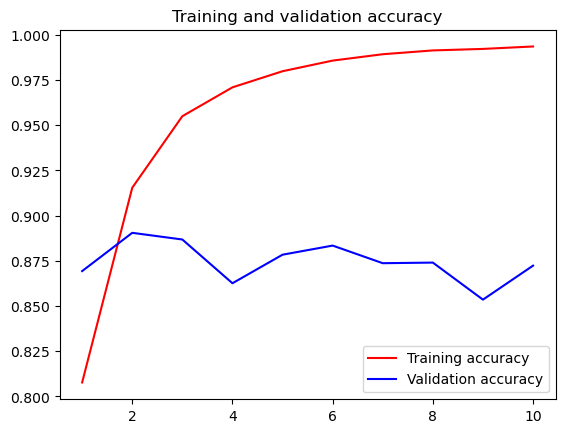

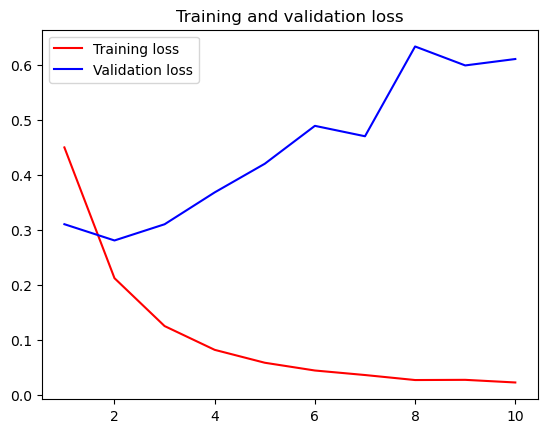

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.layers import Bidirectional

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as layers

model3 = Sequential()
model3.add(Embedding(input_dim=30000, output_dim=20, input_length=20))
model3.add(Bidirectional(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2)))
model3.add(Dense(units=1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 10
batch_size = 64

history3 = model3.fit(X1_train, y1_train,validation_data = (X1_test,y1_test), epochs=epochs, batch_size=batch_size)

In [ ]:
y_pred_bi=model3.predict(X1_test)
y_pred_bi = np.round(y_pred_).astype(int)

# logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression 

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=75)
X1 = tfidf.fit_transform(df['Text']).toarray()
y1 = df['oh_label']

In [34]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y1, test_size = 0.3, stratify=y1, random_state = 42)

In [69]:
logreg = LogisticRegression(solver='liblinear') 
logreg.fit(X2_train,y2_train) 
y_pred=logreg.predict(X2_test) 

In [70]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score
from sklearn.metrics import f1_score
accuracy = accuracy_score(y2_test, y_pred)
r2 = r2_score(y2_test,y_pred)
auc = roc_auc_score(y2_test,y_pred)
print('Accuracy of logistic regression classifier: {:.2f}%'.format(accuracy*100))
print('auc score of logistic regression classifier: {:.2f}'.format(auc))

Accuracy of logistic regression classifier: 84.30%
auc score of logistic regression classifier: 0.69


In [73]:
len(X2_train)

10414

In [74]:
from sklearn import metrics 
cnf_matrix1 = metrics.confusion_matrix(y2_test, y_pred) 
cnf_matrix1 

array([[3357,   94],
       [ 607,  406]], dtype=int64)

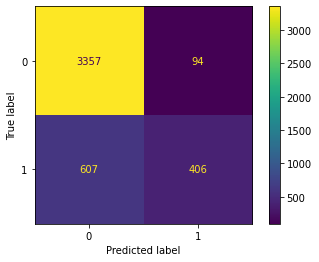

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score
cm_display = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix1)
cm_display.plot()
plt.show()

# Neural Networks

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=75)
X1 = tfidf.fit_transform(df['Text']).toarray()
y1 = df['oh_label']

In [77]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X1, y1, test_size = 0.2, stratify=y1, random_state = 42)

In [78]:
from keras.utils.np_utils import to_categorical
y3_train=to_categorical(y1_train, num_classes = 2, dtype='float32')
y3_test=to_categorical(y1_test, num_classes = 2, dtype='float32')

In [79]:
import tensorflow as tf
import tensorflow.keras.layers as layers
model2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(2,activation='sigmoid')
])


model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history2=model2.fit(X3_train, y3_train, epochs=15, validation_data=(X3_test, y3_test))

Epoch 1/15
372/372 [==============================] - 1s 2ms/step - loss: 0.4158 - accuracy: 0.8375 - val_loss: 0.3944 - val_accuracy: 0.8441
Epoch 2/15
372/372 [==============================] - 1s 2ms/step - loss: 0.3782 - accuracy: 0.8574 - val_loss: 0.3951 - val_accuracy: 0.8458
Epoch 3/15
372/372 [==============================] - 1s 2ms/step - loss: 0.3682 - accuracy: 0.8607 - val_loss: 0.4005 - val_accuracy: 0.8468
Epoch 4/15
372/372 [==============================] - 1s 2ms/step - loss: 0.3600 - accuracy: 0.8632 - val_loss: 0.4007 - val_accuracy: 0.8441
Epoch 5/15
372/372 [==============================] - 1s 2ms/step - loss: 0.3531 - accuracy: 0.8665 - val_loss: 0.3998 - val_accuracy: 0.8474
Epoch 6/15
372/372 [==============================] - 1s 2ms/step - loss: 0.3456 - accuracy: 0.8694 - val_loss: 0.4090 - val_accuracy: 0.8485
Epoch 7/15
372/372 [==============================] - 1s 2ms/step - loss: 0.3395 - accuracy: 0.8706 - val_loss: 0.4355 - val_accuracy: 0.8424
Epoch 

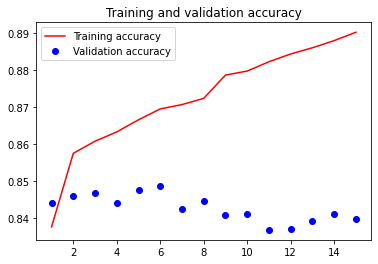

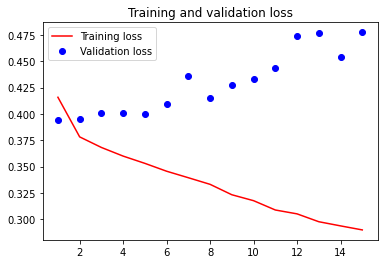

93/93 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.8397
Accuracy: 83.97%
93/93 [==============================] - 0s 823us/step
AUC score: 0.22


In [80]:
acc1 = history2.history['accuracy']
val_acc1 = history2.history['val_accuracy']
loss1 = history2.history['loss']
val_loss1 = history2.history['val_loss']
epochs = range(1, len(acc1) + 1)
plt.plot(epochs, acc1, 'r', label='Training accuracy')
plt.plot(epochs, val_acc1, 'bo', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss1, 'r', label='Training loss')
plt.plot(epochs, val_loss1, 'bo', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

loss, accuracy = model2.evaluate(X3_test, y3_test)
print('Accuracy: {:.2f}%'.format(accuracy*100))

y_pred_prob = model2.predict(X3_test)[:, 1]

y_pred_prob = y_pred_prob.reshape(-1, 1) 

auc_score = roc_auc_score(y3_test, y_pred_prob)
print('AUC score: {:.2f}'.format(auc_score))


# Decision Tree Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
clf = DecisionTreeClassifier(max_depth =4, random_state = 42)
clf.fit(X2_train, y2_train)
pred_decision_tree = clf.predict(X2_test)

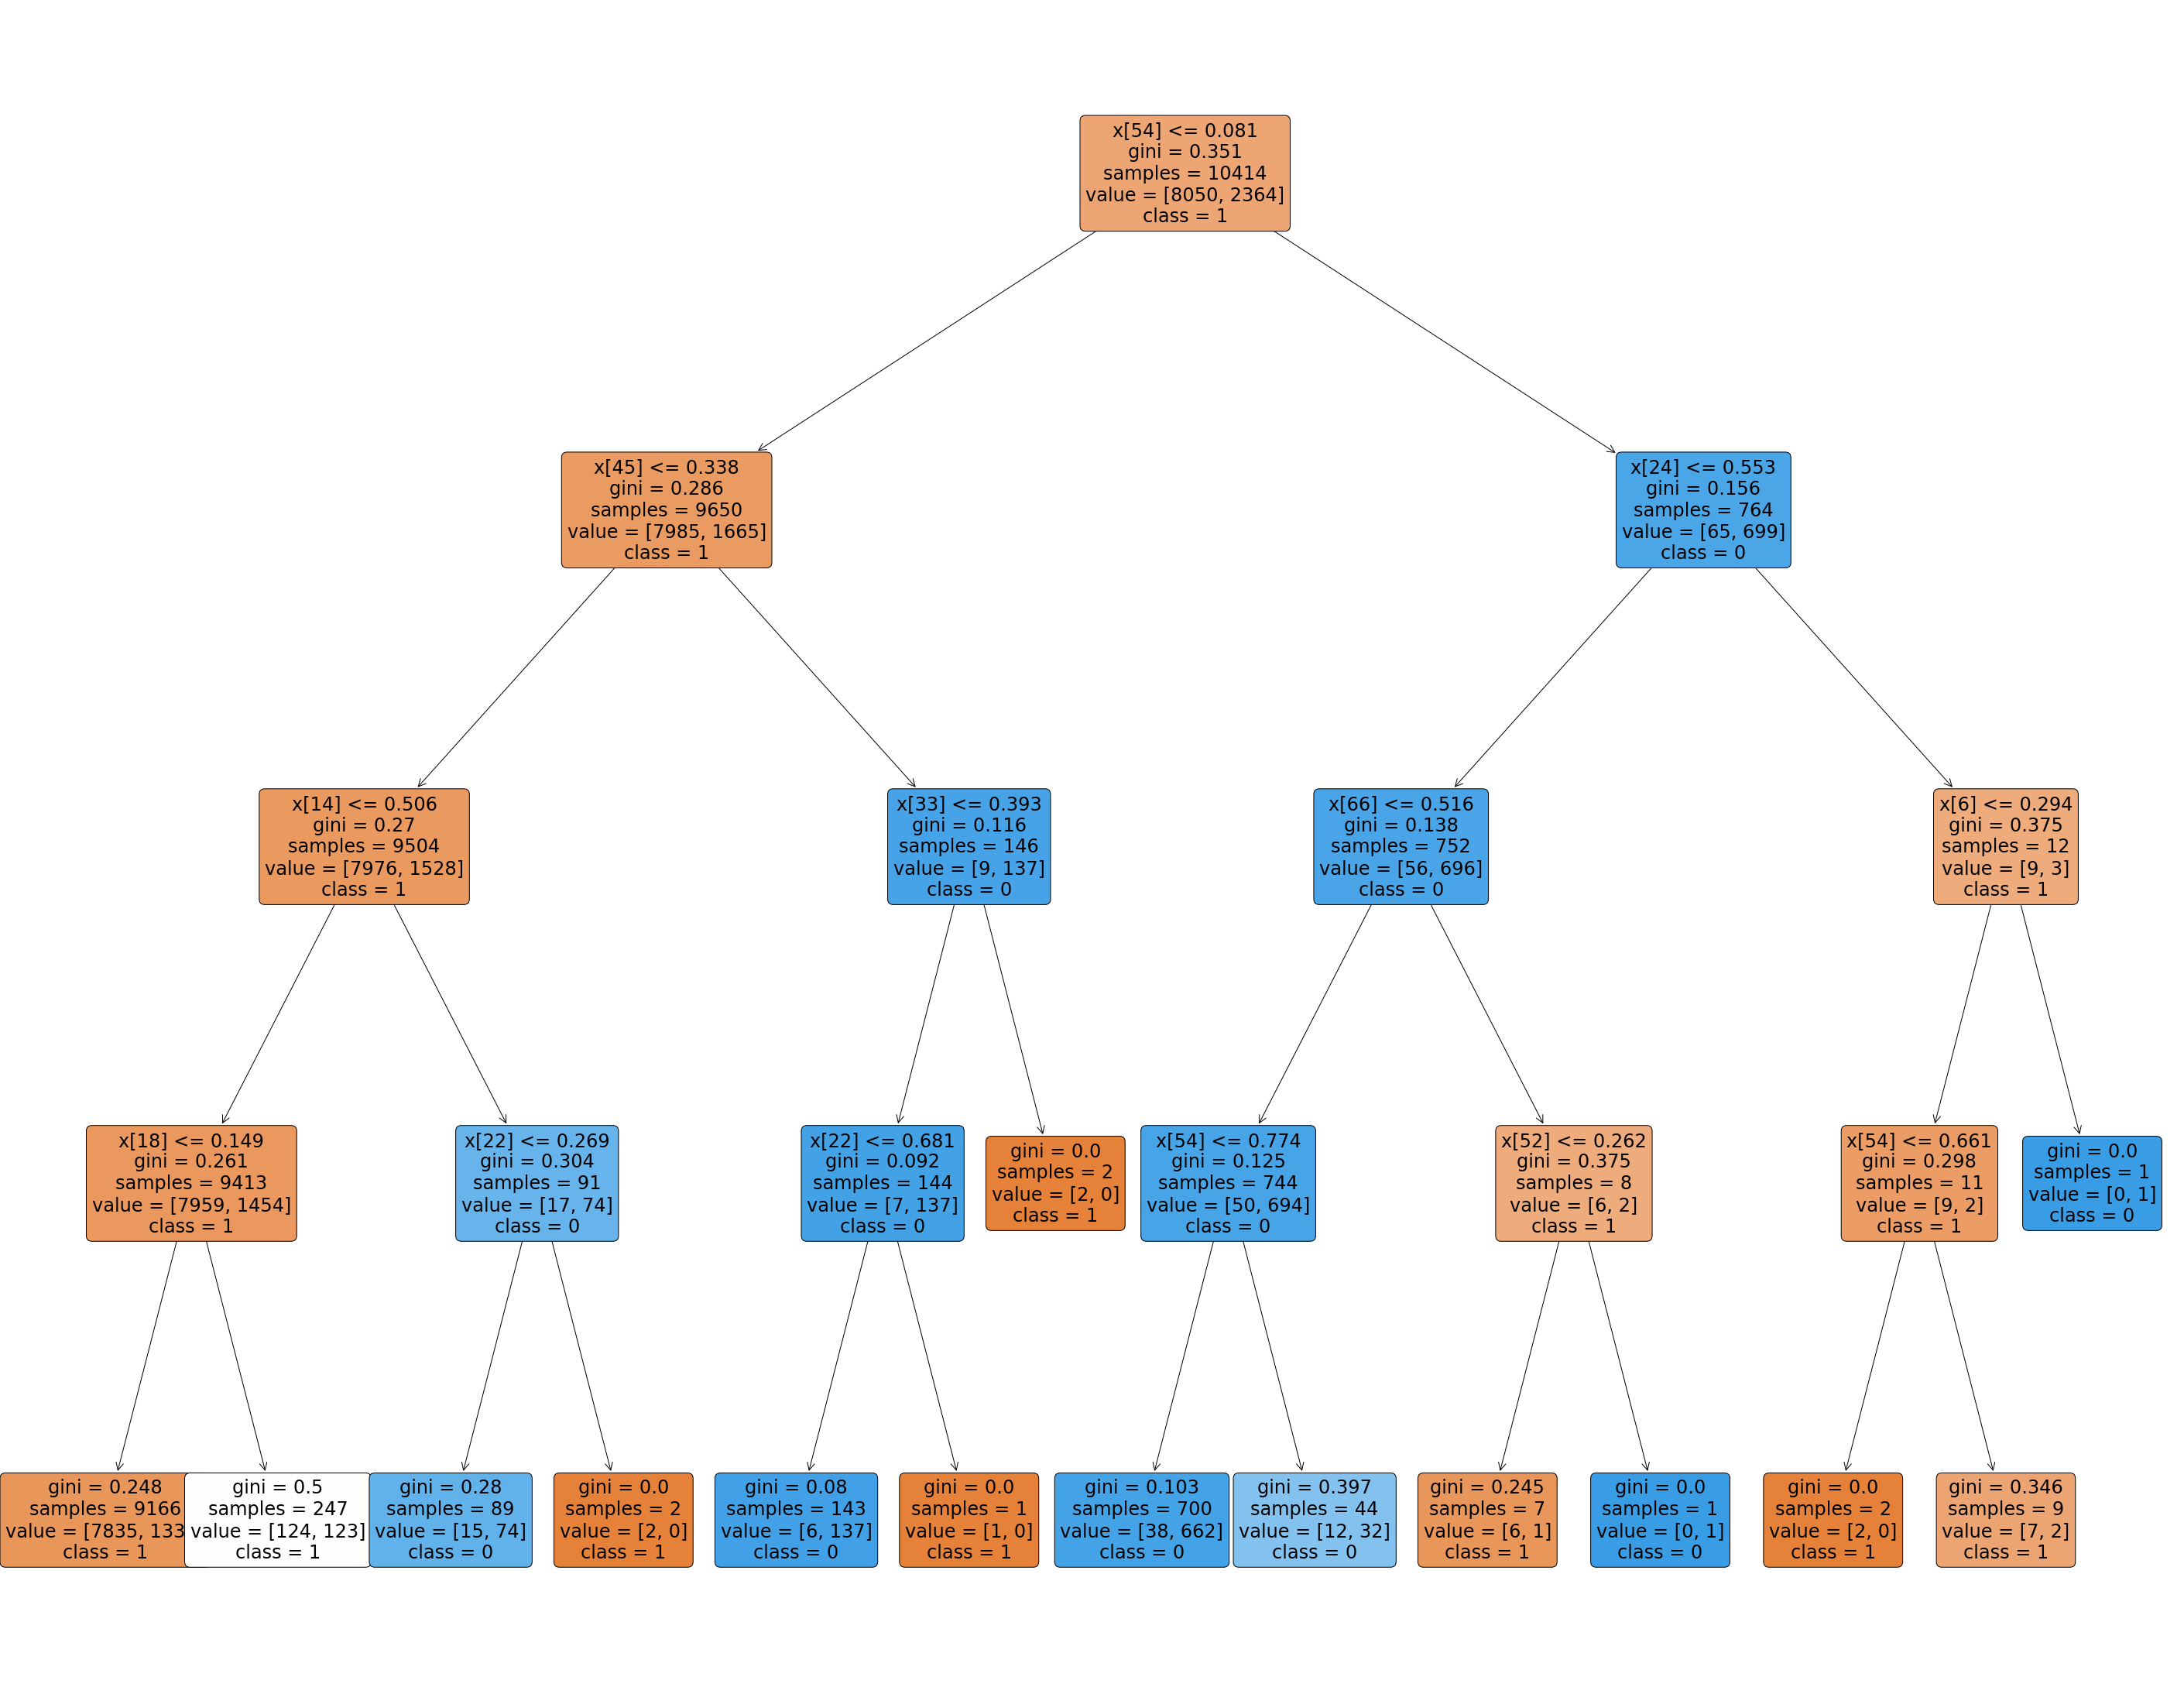

In [83]:
from sklearn import tree
import matplotlib.pyplot as plt
labels=y1.unique().astype(str).tolist()
plt.figure(figsize=(50,40))

a = tree.plot_tree(clf,
                   
                   class_names=labels,

                   rounded = True,

                   filled = True,

                   fontsize=24)

plt.show()

In [84]:
cnf_matrix2 = confusion_matrix(y2_test, pred_decision_tree )
print(cnf_matrix2)

[[3412   39]
 [ 681  332]]


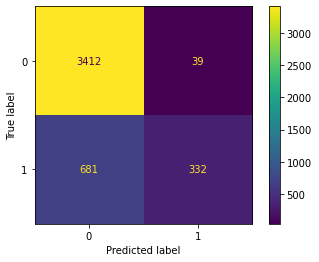

In [85]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix2)
cm_display.plot()
plt.show()

In [87]:
from sklearn.metrics import accuracy_score, roc_auc_score
accuracy = accuracy_score(y2_test, pred_decision_tree)
auc = roc_auc_score(y2_test, pred_decision_tree)
print('Accuracy of decision tree classifier: {:.2f}%'.format(accuracy*100))
print('AUC score of decision tree classifier: {:.2f}%'.format(auc))

Accuracy of decision tree classifier: 83.87%
AUC score of decision tree classifier: 0.66%


# Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X2_train, y2_train)
classifier_rf.oob_score_

0.8350297676205108

In [89]:
Y_pred = classifier_rf.predict(X2_test)

In [90]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print('Random Forest Classifier:')
from sklearn.metrics import accuracy_score, f1_score
print('Accuracy score:', round(accuracy_score(y2_test, Y_pred) * 100, 2))
print('F1 score:', round(f1_score(y2_test, Y_pred, average='weighted') * 100, 2))

Random Forest Classifier:
Accuracy score: 83.04
F1 score: 79.05


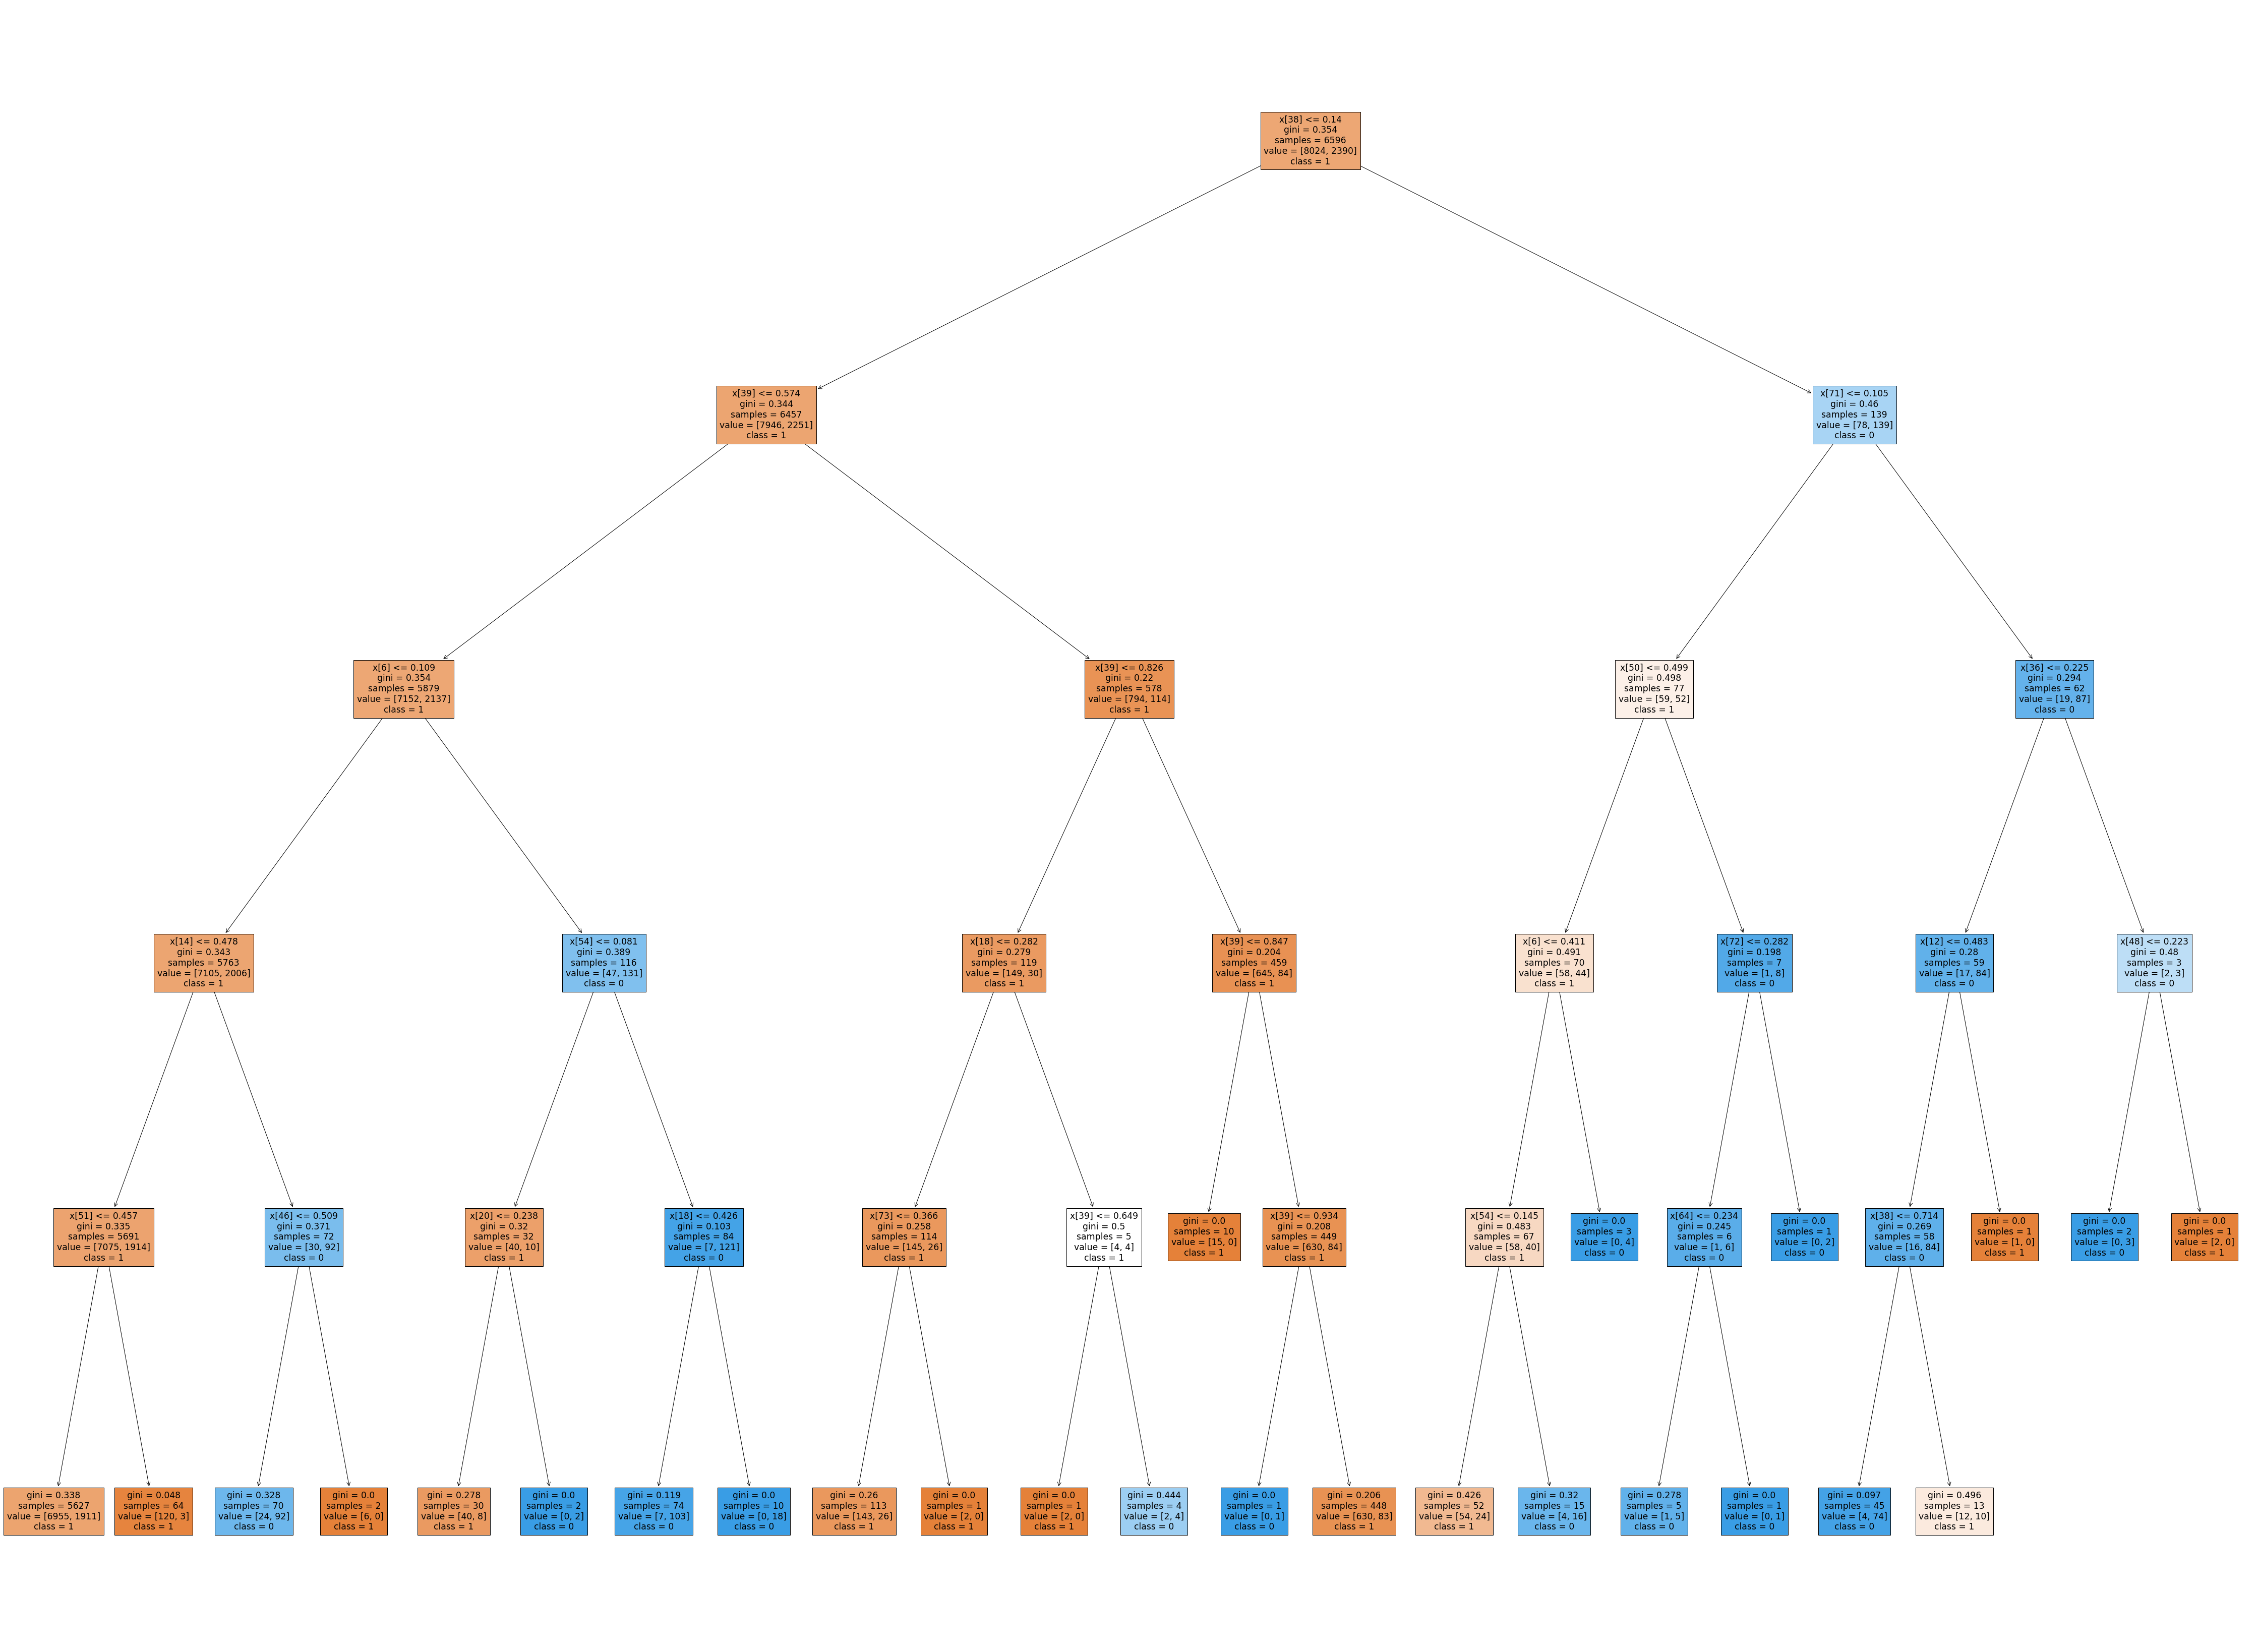

In [91]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(80,60))
plot_tree(classifier_rf.estimators_[5],class_names=labels,filled=True);

In [92]:
from sklearn.metrics import accuracy_score, roc_auc_score
accuracy = accuracy_score(y2_test, pred_decision_tree)
auc = roc_auc_score(y2_test,pred_decision_tree)
print('Accuracy: {:.2f}%'.format(accuracy*100))
print('AUC: {:.2f}%'.format(auc))

Accuracy: 83.87%
AUC: 0.66%


# AdaBoost Classifier

In [93]:
from sklearn.ensemble import AdaBoostClassifier

In [97]:
clf2 = AdaBoostClassifier(n_estimators=100)
clf2 = clf2.fit(X2_train, y2_train)
y_pred = clf.predict(X2_test)
accuracy = accuracy_score(y2_test, y_pred)
auc = roc_auc_score(y2_test, y_pred)
print("accuracy is: ",accuracy)
print("AUC:",auc)

accuracy is:  0.8387096774193549
AUC: 0.6582191579017828


In [98]:
from sklearn import metrics 
cnf_matrix3 = metrics.confusion_matrix(y2_test, y_pred) 
cnf_matrix3

array([[3412,   39],
       [ 681,  332]], dtype=int64)

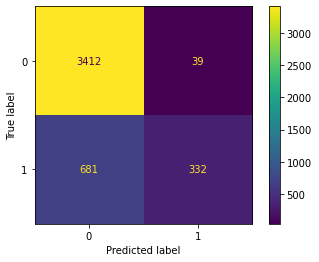

In [99]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix3)
cm_display.plot()
plt.show()

# XGBoost Classfier

In [100]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X2_train,label=y2_train,enable_categorical=True)

In [101]:
from xgboost import XGBClassifier
params = {
            'objective':'multi:softmax',
            'max_depth': 4,
            'num_class': 2,
            'alpha': 10,
            'learning_rate': 0.01,
            'n_estimators':100
        }
            

xgb_clf = XGBClassifier(**params)

xgb_clf.fit(X2_train, y2_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

In [103]:
y_pred2 = xgb_clf.predict(X2_test)
from sklearn.metrics import accuracy_score
auc = roc_auc_score(y2_test,y_pred2)
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y2_test, y_pred2)))
print("AUC:",auc)

XGBoost model accuracy score: 0.8389
AUC: 0.65871274131738


In [104]:
from xgboost import cv

params = {'objective':'multi:softmax','colsample_bytree': 0.3,'learning_rate': 0.01, 'num_class': 2,
                'max_depth': 4, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [105]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.682334,0.000836,0.672159,0.003673
1,0.731066,0.007323,0.722489,0.002526
2,0.740400,0.016475,0.727247,0.010889
3,0.744563,0.020857,0.726781,0.009240
4,0.760242,0.011166,0.743131,0.001628


# KNN Classifier

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X2_train, y2_train)

y3_pred = classifier.predict(X2_test)

In [107]:
cnf = confusion_matrix(y2_test, y3_pred)
cnf

array([[3329,  122],
       [ 688,  325]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

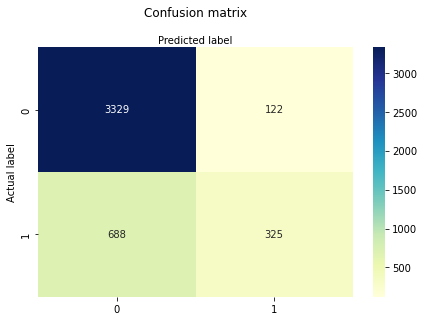

In [108]:
import seaborn as sns
fig, ax2 = plt.subplots(sharex = True)
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g') 
ax2.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [109]:
print("Accuracy:",metrics.accuracy_score(y2_test, y3_pred)) 
print("AUC:",roc_auc_score(y2_test,y3_pred))

Accuracy: 0.8185483870967742
AUC: 0.6427385741374877


# Gaussian Nb

In [110]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [111]:
classifier = GaussianNB();
classifier.fit(X2_train, y2_train)

GaussianNB()

In [112]:
y4_pred = classifier.predict(X2_test)
cm = confusion_matrix(y2_test, y4_pred)
cm

array([[ 793, 2658],
       [  72,  941]], dtype=int64)

In [113]:
print("Accuracy:",metrics.accuracy_score(y2_test, y4_pred)) 
print("AUC:",roc_auc_score(y2_test,y4_pred))

Accuracy: 0.38844086021505375
AUC: 0.5793562276324902
